In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np




### Read Data

In [23]:
df = pd.read_csv("car_evaluation.csv",header=None)
df.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Check null value and Duplicated 

In [24]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


0

### Add the columns name 

In [25]:
header=['buying_price','maint_cost','car_doors','car_seaters','boot_space','safety','buying_decision']
df.columns=header
df.head()

,buying_price,maint_cost,car_doors,car_seaters,boot_space,safety,buying_decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
df.buying_decision.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: buying_decision, dtype: int64

### Define function for KNN model 
* It return y_valid and y_test 

In [27]:
def knn(x_train,y_train,X_valid,X_test,k):  
    knn = KNeighborsClassifier(n_neighbors=k,metric="euclidean")
    knn.fit(x_train, y_train,)
    y_valid_pred  = knn.predict(X_valid)
    y_test_pred = knn.predict(X_test)
    return y_valid_pred,y_test_pred


### Split the data withm Random sample 
* 1000 for training 
* 300 for validation
* 428 for testing 

In [28]:
shuffled_df = df.sample(frac=1, random_state=42)

train_data, remaining_data = train_test_split(shuffled_df, train_size=1000, random_state=42)
valid_data, test_data = train_test_split(remaining_data, train_size=300, random_state=42)


### Function encoding 
* it takes data frame and convert categorical data to numbers 

In [29]:
def encoding (df): 
    encoder = LabelEncoder()
    for i in header:
          df[i] = encoder.fit_transform(df[i])
          






#### Make label endoding for test,validation and traning data

In [30]:
encoding(train_data)
encoding(valid_data)
encoding(test_data)


In [31]:
train_data

,buying_price,maint_cost,car_doors,car_seaters,boot_space,safety,buying_decision
1299,1,3,0,0,1,1,2
1302,1,3,0,0,0,1,2
320,3,2,3,2,1,0,0
595,0,0,2,0,2,2,2
1499,1,0,3,1,1,0,3
...,...,...,...,...,...,...,...
945,2,3,3,0,2,1,2
4,3,3,0,0,1,2,2
665,0,2,0,1,0,0,0
488,0,3,2,0,2,0,2


### Function data_for_modeling 
* Split The Traget column

In [32]:
def data_for_modeling (data_frame):
    x= data_frame.drop(["buying_decision"], axis=1)
    y = data_frame["buying_decision"]
    return x,y


In [33]:
x_train_data,y_train_data =data_for_modeling(train_data)
X_valid_data,y_valid_data =data_for_modeling(valid_data)
X_test_data,y_test_data =data_for_modeling(test_data)

### Create list for traning precentege and Ks value

In [34]:
training_proportions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


valid 0.74
test 0.7967289719626168
max_valid_index 6
max_test_index 5


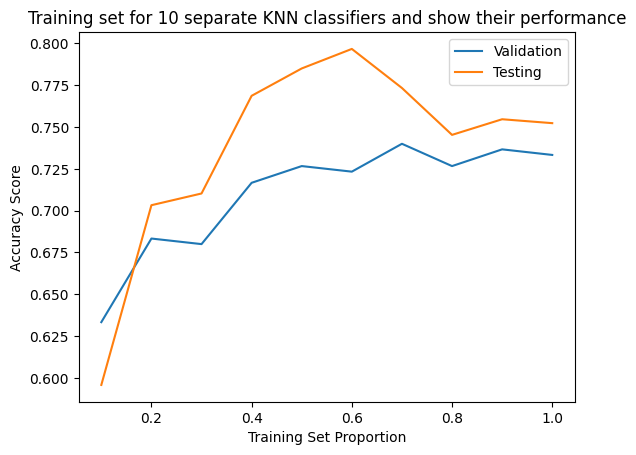

In [35]:
def mult_KNN():
    validation_scores=[]
    testing_scores=[]
    max_valid_score_index = -1
    max_test_score_index = -1

    for i in training_proportions:
        num_train_samples = int(i * len(train_data))

        target_Xtrain = train_data.iloc[:num_train_samples, :-1]
        target_Ytrain = train_data.iloc[:num_train_samples, -1]

        y_valid_pred,y_test_pred=knn(target_Xtrain,target_Ytrain,X_valid_data,X_test_data,k=2)
        validation_acc = accuracy_score(y_valid_data, y_valid_pred)
        validation_scores.append(validation_acc)
        if(validation_acc == max(validation_scores)):
            max_valid_score_index = training_proportions.index(i)
        
        testing_acc = accuracy_score(y_test_data, y_test_pred)
        testing_scores.append(testing_acc)
        if(testing_acc == max(testing_scores)):
            max_test_score_index = training_proportions.index(i)
       
    print("valid",max(validation_scores))
    print("test",max(testing_scores))
    print("max_valid_index", max_valid_score_index)
    print("max_test_index", max_test_score_index)

    plt.plot(training_proportions, validation_scores, label='Validation')
    plt.plot(training_proportions, testing_scores, label='Testing')
    plt.xlabel('Training Set Proportion')
    plt.ylabel('Accuracy Score')
    plt.title("Training set for 10 separate KNN classifiers and show their performance")
    plt.legend()
    plt.show()

mult_KNN()

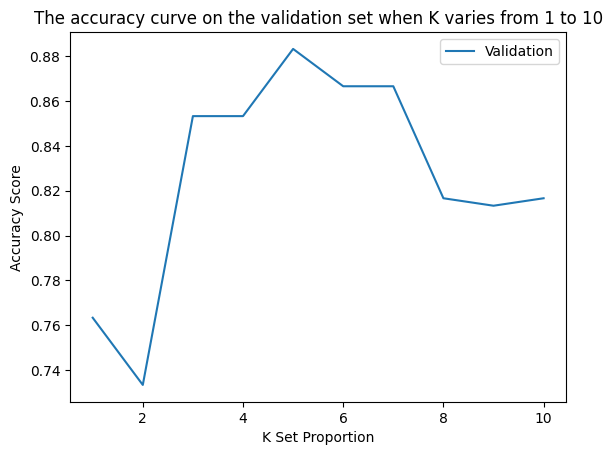

In [36]:
def Check_k():
    K_proportions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    validation_scores=[]
    testing_scores=[]

    for i in K_proportions:       
        y_valid_pred,y_test_pred=knn(x_train_data,y_train_data,X_valid_data,X_test_data,k=i)
        validation_acc = accuracy_score(y_valid_data, y_valid_pred)
        validation_scores.append(validation_acc)
        testing_acc = accuracy_score(y_test_data, y_test_pred)
        testing_scores.append(testing_acc)
    plt.plot(K_proportions, validation_scores, label='Validation')
    plt.xlabel('K Set Proportion')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.title("The accuracy curve on the validation set when K varies from 1 to 10")
    plt.show()


Check_k()